In [2]:
# Import required packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


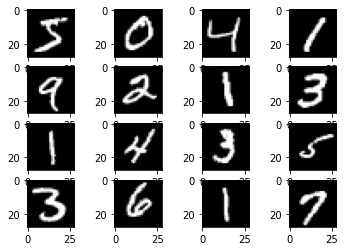

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Shape of the dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# Subplots showing the data in image form
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()
y_train

In [6]:
# One-hot Encoding for labeling
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
# Normalize data to range [0,1]
x_train = x_train/255
x_test = x_test/255

# Reshaping the data to let the network know that there's only one color channel
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
# Creating the training model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model = Sequential()
# Convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# No need for padding since 28/4 = 7 (whole number) and our stride lengthis 1.
# Max Pooling layer
model.add(MaxPool2D(pool_size=(2,2))) # Pool size is usually half the kernel size
# Flatten the images
model.add(Flatten())
# Adding a Dense layer
model.add(Dense(128,activation='relu')) # 0 < 128 < 784
# Output layer
model.add(Dense(10,activation='softmax')) # Softmax since the problem is a multiclass problem
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train the model
model.fit(x_train,y_cat_train, epochs=10,validation_data=(x_test,y_cat_test))
model.save('digit_recognition.h5')
metrics = pd.DataFrame(model.history.history)
metrics


Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.7221 - accuracy: 0.7872 - val_loss: 0.3465 - val_accuracy: 0.8980
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3055 - accuracy: 0.9096 - val_loss: 0.2458 - val_accuracy: 0.9278
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2362 - accuracy: 0.9290 - val_loss: 0.1955 - val_accuracy: 0.9425
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1928 - accuracy: 0.9427 - val_loss: 0.1687 - val_accuracy: 0.9492
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1664 - accuracy: 0.9507 - val_loss: 0.1520 - val_accuracy: 0.9531
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1488 - accuracy: 0.9555 - val_loss: 0.1357 - val_accuracy: 0.9596
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1345 - accuracy: 0.9598 - val_loss: 0.1301 -

,loss,accuracy,val_loss,val_accuracy
0,0.722097,0.787250,0.346492,0.8980
1,0.305467,0.909550,0.245752,0.9278
2,0.236239,0.928967,0.195539,0.9425
3,0.192760,0.942733,0.168714,0.9492
4,0.166444,0.950700,0.152013,0.9531
5,0.148753,0.955500,0.135671,0.9596
6,0.134504,0.959800,0.130055,0.9579
7,0.123036,0.962183,0.114371,0.9650
8,0.114215,0.965450,0.117792,0.9640
9,0.105976,0.968483,0.106011,0.9675


<AxesSubplot:>

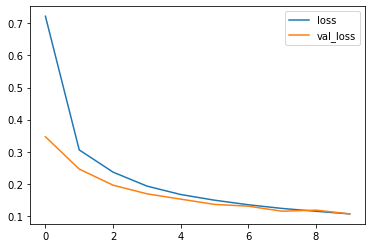

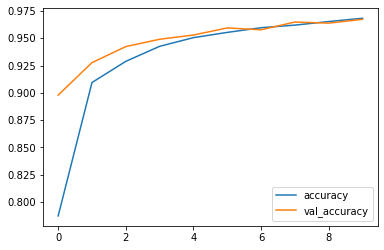

In [11]:
metrics[['loss', 'val_loss']].plot()
metrics[['accuracy', 'val_accuracy']].plot()

Test loss: 0.10601142793893814
Test accuracy: 0.9674999713897705
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.96      0.96      0.96       892
           6       0.97      0.98      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<AxesSubplot:>

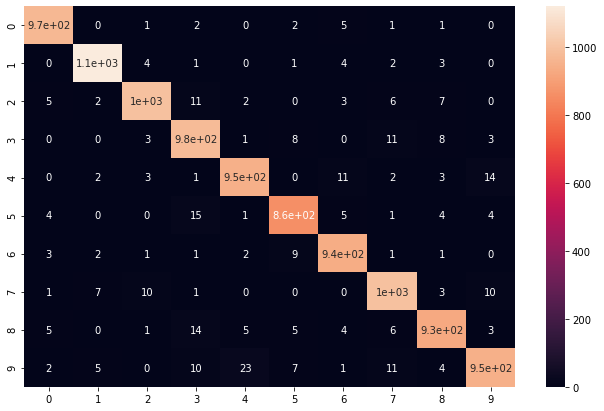

In [12]:
# Evaluate the model
score = model.evaluate(x_test, y_cat_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import classification_report,confusion_matrix
predictions = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)
plt.figure(figsize=(11,7))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [23]:
from tensorflow.keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
import os
import cv2
from PIL import ImageGrab, Image
model = load_model('digit_recognition.h5')

In [25]:
def get_handle():
    toplist = []
    windows_list = []
    canvas = 0
    def enum_win(hwnd, result):
        win_text = win32gui.GetWindowText(hwnd)
        windows_list.append((hwnd, win_text))
    win32gui.EnumWindows(enum_win, toplist)
    for (hwnd, win_text) in windows_list:
        if 'tk' == win_text:
            canvas = hwnd
    return canvas


def preprocessing_image():
    """function to preprocess the image"""
    img = cv2.imread('test.jpg')
    # invert the colors of the image
    img = cv2.bitwise_not(img)
    # convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # color channels = 1
    img = img.reshape(364,364,1)
    # resize the image
    img = cv2.resize(img, (28,28), interpolation = cv2.INTER_AREA)
    img = img.reshape(1, 28, 28, 1)
    # scale the image
    img = img/255.0
    return img


def predict_digit(img):
    img.save('test.jpg')
    img = preprocessing_image()
    #predicting the digit
    result = model.predict([img])[0]
    # return the predicted digit and the accuracy
    return np.argmax(result), max(result)

In [20]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white",
        cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica",48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =
        self.classify_handwriting)
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
        
    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        hwnd = get_handle()
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of thecanvas
        x1, y1, x2, y2 = rect
        im = ImageGrab.grab((x1+40, y1+40, x2+100, y2+100))
        digit, acc = predict_digit(im)
        # print(digit)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
        
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y +r, fill='black')

In [26]:
app = App()
mainloop()